In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm    
from sklearn.linear_model import LinearRegression

sns.set_theme()

In [2]:
df_raw = pd.read_csv("../data/real_estate_price_size_year_view.csv")

In [3]:
df = df_raw.copy()
df["view"] = df["view"].map({'No sea view': 0, 'Sea view': 1})

In [20]:
df.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


In [26]:
# y = df.iloc[:, 0]
# x1 = df.iloc[:, 1:]
# X = sm.add_constant(x1)
# results = sm.OLS(y, X).fit()
# results.summary()
# yhat_no = -5398000 + 223.0316 * df["size"] + 2718.9489 * df["year"]
# yhat_yes = -5398000 + 223.0316 * df["size"] + 2718.9489 * df["year"] + 56730

In [4]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [15]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
intercept = model.intercept_
coef = model.coef_ 
print(f"Coef: {coef}")
print(f"Intercept: {intercept}")


Coef: [  223.03161944  2718.94888864 56726.01979839]
Intercept: -5397914.181560062


In [28]:
X.shape

(100, 3)

$R^2_{adj.} = 1 - (1 - r2)*\frac{n-1}{n-p-1}$

In [30]:
r2 = model.score(X, y)
n = X.shape[0]
p = X.shape[1]

r2_adjusted = 1 - (1 - r2) * ((n -1)/ (n-p-1))
r2_adjusted

0.9101409029572761

In [10]:
yhat = model.predict(X)

X_no = X.copy()
X_no["view"] = 0
yhat_no = model.predict(X_no)
X_yes = X.copy()
X_yes["view"] = 1
yhat_yes = model.predict(X_yes)

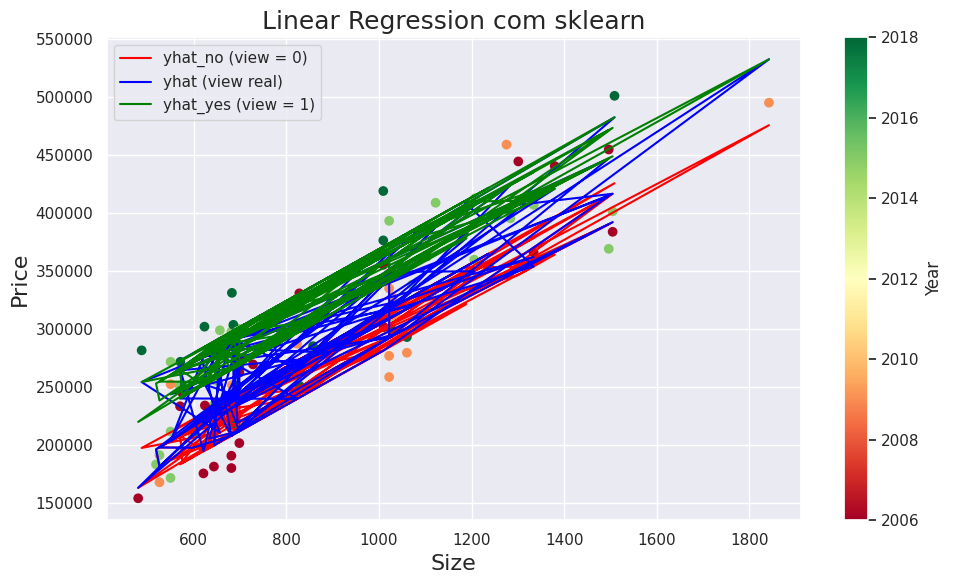

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(df["size"], y, c=df["year"], cmap="RdYlGn")

plt.plot(df["size"], yhat_no, color="red", label="yhat_no (view = 0)")
plt.plot(df["size"], yhat, color="blue", label="yhat (view real)")
plt.plot(df["size"], yhat_yes, color="green", label="yhat_yes (view = 1)")

plt.xlabel("Size", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("Linear Regression com sklearn", fontsize=18)
plt.colorbar(label="Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()